# Regression
> California Housing Dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets, Sequential, layers
from keras import callbacks

## Prepare Data

In [4]:
(x_train, y_train), (x_test, y_test) = datasets.california_housing.load_data()

743530/743530 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')

Train data shape: (16512, 8)
Test data shape: (4128, 8)


In [6]:
x_train[0]

array([-118.27  ,   34.09  ,   52.    , 2327.    ,  555.    , 1048.    ,
        491.    ,    3.7847], dtype=float32)

In [7]:
y_train[0]

np.float32(252300.0)

### Pre-processing

In [8]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [9]:
y_train = y_train / 100_000
y_test = y_test / 100_000

## Model Design

In [10]:
def get_model():
    model = Sequential([
        layers.Input(shape=(x_train.shape[1],), name='InputLayer'),
        layers.Dense(64, activation='relu', name="Dense1"),
        layers.Dense(64, activation='relu', name="Dense2"),
        layers.Dense(1, name="OutLayer")
    ])
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_absolute_error']
    )
    return model

model = get_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutLayer (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

## Training

### Define Callbacks

In [23]:
model_checkpoint = callbacks.ModelCheckpoint(
    'model.keras',
    monitor='val_loss',
    save_best_only=True
)
csv_logger = callbacks.CSVLogger('training.csv')
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10
)
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=1
)
tensorboard = callbacks.TensorBoard(
    log_dir='./logs',
    histogram_freq=1
)

my_callbacks = [model_checkpoint, csv_logger, early_stopping, reduce_lr, tensorboard]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./logs

In [24]:
model = get_model()
num_epochs = 100
history = model.fit(
    x_train,
    y_train,
    epochs=num_epochs,
    batch_size=16,
    validation_split=0.2,
    callbacks=my_callbacks
)

Epoch 1/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0593 - mean_absolute_error: 0.7066 - val_loss: 0.4038 - val_mean_absolute_error: 0.4759 - learning_rate: 0.0010
Epoch 2/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3761 - mean_absolute_error: 0.4398 - val_loss: 0.3662 - val_mean_absolute_error: 0.4296 - learning_rate: 0.0010
Epoch 3/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3526 - mean_absolute_error: 0.4208 - val_loss: 0.3473 - val_mean_absolute_error: 0.4120 - learning_rate: 0.0010
Epoch 4/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3322 - mean_absolute_error: 0.4114 - val_loss: 0.3455 - val_mean_absolute_error: 0.4000 - learning_rate: 0.0010
Epoch 5/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3395 - mean_absolute_error: 0.4097 - val_loss: 0.3269 - val_mean_absolute_error: 0.3914 - learning_rate: 0.0010
Epoch 6/100
826/826 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3040 - mean_absolute_error: 0.3902 - val_loss: 0.3462 - val_me

## Evaluation

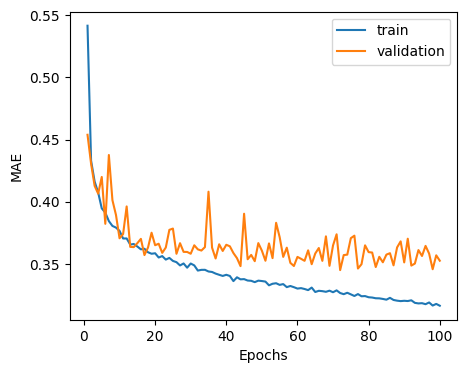

In [ ]:
epochs = range(1, len(history.history['mean_absolute_error'])+1)
plt.figure(figsize=(5,4))
plt.plot(epochs, history.history['mean_absolute_error'], label="train")
plt.plot(epochs, history.history['val_mean_absolute_error'], label="validation")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()

In [ ]:
test_mean_squared_error, test_mean_absolute_error = model.evaluate(x_test, y_test)
test_mean_absolute_error *= 100_000
print(f'MSE on Test: {test_mean_squared_error:.2f}')
print(f'MAE on Test: {test_mean_absolute_error:,.2f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2987 - mean_absolute_error: 0.3609
MSE on Test: 0.29
MAE on Test: 35,738.19


## Prediction

In [ ]:
X_test_samples = x_test[0:3]
# x_test_normalized = (X_test_samples - mean) / std
preds = model.predict(X_test_samples)
preds_dollar = [np.round(x*100_000, 3) for x in preds]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [ ]:
print('Predicted house prices')
for i, pred in enumerate(preds_dollar):
    print(f'{i}: {pred[0]:,}')

Predicted house prices
0: 199,288.53125
1: 237,078.46875
2: 171,490.265625


In [ ]:
test_labels = y_test[0:3] * 100_000
print('Real house prices')
for i, label in enumerate(test_labels):
    print(f'{i}: {label:,}')

Real house prices
0: 397,900.0
1: 227,900.0
2: 172,100.0


## Save Model + Weights

### Save Model's Structure

In [ ]:
import keras

In [ ]:
json_config = model.to_json()

In [ ]:
new_model = keras.models.model_from_json(json_config)

In [ ]:
new_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,405 (56.27 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,604 (37.52 KB)

### Save Model Weights

In [ ]:
model.save_weights('model.weights.h5')

### Load Model Weights

In [ ]:
model2 = get_model()
model2.load_weights('model.weights.h5')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_mean_squared_error, test_mean_absolute_error = model2.evaluate(x_test, y_test)
test_mean_absolute_error *= 100_000
print(f'MSE on Test: {test_mean_squared_error:.2f}')
print(f'MAE on Test: {test_mean_absolute_error:,.2f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2987 - mean_absolute_error: 0.3609
MSE on Test: 0.29
MAE on Test: 35,738.19


### Save Model+Weights

In [ ]:
model.save('model.h5')
model.save('model.keras')

### Load Model+weights

In [ ]:
model3 = keras.models.load_model('model.keras')
# model3 = keras.saving.load_model('model.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
model3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense1 (Dense)                  │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutLayer (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,604 (37.52 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,803 (18.77 KB)